# Week 3 Assignment
## Authors: Alexander Ng & Philip Tanofsky
### Course: CUNY DATA620 Web Analytics (Spring 2022)
### Due Date: February 20, 2022

In [29]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plot
#import numpy as np
import pandas as pd

In [30]:
crime_data = pd.read_csv("moreno_crime/out.moreno_crime_crime", sep=" ", dtype=str, skiprows=range(1, 2))
#crime_data
crime_data = crime_data.drop(['unweighted'], axis=1)
crime_data = crime_data.rename(columns={"%": "Person", "bip": "Crime"})
crime_data['Person'] = crime_data['Person'] + 'P'
crime_data['Crime']  = crime_data['Crime']  + 'C'
crime_data

,Person,Crime
0,1P,1C
1,1P,2C
2,1P,3C
3,1P,4C
4,2P,5C
...,...,...
1471,825P,399C
1472,826P,300C
1473,827P,265C
1474,828P,298C


In [31]:
edge_data = pd.read_csv("moreno_crime/rel.moreno_crime_crime.person.role", dtype=str, header=None)
crime_df = crime_data.join(edge_data)
crime_df.columns=['Person', 'Crime', 'Role']
crime_df

,Person,Crime,Role
0,1P,1C,Suspect
1,1P,2C,Victim
2,1P,3C,Victim
3,1P,4C,Suspect
4,2P,5C,Victim
...,...,...,...
1471,825P,399C,Suspect
1472,826P,300C,Suspect
1473,827P,265C,Suspect
1474,828P,298C,Victim


## Data
Read in the data from the text file using Numpy. Archive of data retrieved from: http://konect.cc/networks/moreno_crime/.
- Define data as string, as the nodes are people or crimes.
- Ignore comments which start with '%'
- Ouput array to confirm

Convert the Numpy array to a Pandas dataframe for easier loading to Networkx graph.

Column 0 represents the people, so add the character 'P' to each value in the column to distinguish each person node as such. Column 1 represents the crimes, to add the character 'C' to each value in the column to distinguish each crime node as such. This additional identifier was needed as the first row connects 1 to 1, but the Networkx graph didn't recognize 1 person to 1 crime, thus added the alpha identifier.

Generate the Networkx graph object from the Pandas dataframe

In [32]:
# Convert Pandas DF to NetworkX graph
# https://networkx.org/documentation/networkx-1.11/reference/generated/networkx.convert_matrix.from_pandas_dataframe.html?highlight=pandas#networkx.convert_matrix.from_pandas_dataframe
crime_g = nx.from_pandas_dataframe(crime_df, 'Person', 'Crime', edge_attr='Role')
crime_g.name = "Crime graph from pandas adjacency matrix"
crime_g

Output the total number of nodes in the graph, people and crimes.

In [33]:
crime_g.number_of_nodes()

1380

Output the total number of edges in the graph, edges only connect a person to a crime.

In [34]:
crime_g.number_of_edges()

1476

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


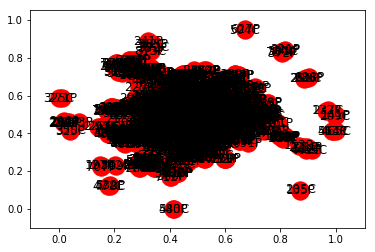

In [35]:
nx.draw_networkx(crime_g)

Diameter of the full graph does not exist as the full graph is not fully connected.

In [36]:
nx.diameter(crime_g)

NetworkXError: Graph not connected: infinite path length

Confirmation the graph is not fully connected with function is_connected(). Result is False.

In [38]:
# Confirm graph is not connected with built-in Networkx function
nx.is_connected(crime_g)

False

Retrieve the component subgraphs of the initial graph object.

In [39]:
# Retrieve the connected subgraphs
crime_sub_g = list(nx.connected_component_subgraphs(crime_g))

Output total number of subgraphs.

In [40]:
# Number of connected/independent subgraphs
len(crime_sub_g)

20

Find the subgraph with the highest number of nodes. Simple for loop comparing the subgraphs by number of nodes. Result shows the subgraph at index 0 is the largest by node count.

In [41]:
# find the connected subgraph with the most nodes --> index 0
idx_max = 0
count = 0
for g in crime_sub_g:
    nodes_max = 0
    if g.number_of_nodes() > nodes_max:
        nodes_max = g.number_of_nodes()
        idx_max = count 
idx_max

0

Output the number of nodes in the largest subgraph.

In [42]:
crime_sub_g[0].number_of_nodes()

1263

Output the number of edges in the largest subgraph.

In [43]:
crime_sub_g[0].number_of_edges()

1377

Output the diamater of the largest subgraph.

In [44]:
nx.diameter(crime_sub_g[0])

32

Output the average shortest path in the largest subgraph.

In [45]:
nx.average_shortest_path_length(crime_sub_g[0])

12.956106570901923

In [46]:
nx.info(crime_g)

'Name: Crime graph from pandas adjacency matrix\nType: Graph\nNumber of nodes: 1380\nNumber of edges: 1476\nAverage degree:   2.1391'

In [47]:
nx.density(crime_g)

0.0015512185894000063

In [48]:
neighbors = nx.all_neighbors(crime_g, '2P')

In [49]:
for n in neighbors:
  print(n)

5C
6C
7C
8C
9C
10C
11C
12C
13C
14C
15C
16C
17C
18C
19C
20C
21C
22C
23C
24C
25C
26C
